# ABEL spin polarization example

By Eir E. Hørlyk (University of Oslo), 6 Mar 2025

### Import ABEL framework

In [1]:
from abel import *
import numpy as np
%load_ext autoreload
%autoreload 2

/Users/eirhorlyk/.abelconfig.toml
Loading ABEL config from '/Users/eirhorlyk/.abelconfig.toml'
Could not import HiPACE++ tools from /Users/eirhorlyk/code/hipace/tools


### Define the linac and beams

In [71]:
# define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 42e-6 # [m]
driver.z_offset = 300e-6 # [m]
driver.emit_nx, driver.emit_ny = 80e-6, 80e-6 # [m rad]
driver.beta_x, driver.beta_y = 0.2, 0.2 # [m]
driver.num_particles = 100000
driver.jitter.x = 1e-6 # [m]
driver.jitter.t = 10e-15 # [s]

# define stage
stage = StageSpin()
#stage = StageBasic()
stage.driver_source = driver
stage.nom_energy_gain = 31.9e9 # [eV]
stage.nom_accel_gradient = 6.4e9 # [GV/m]
stage.plasma_density = 7e21 # [m^-3]
#stage.ramp_beta_mag = 10
#stage.enable_radiation_reaction = False
#stage.upramp = stage.__class__()
#stage.downramp = stage.__class__()

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 18e-6 # [m]
source.z_offset = -36e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.5e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 1000
source.spin_polarization = 0.85
source.spin_polarization_direction = 'x'


# define linac
linac = PlasmaLinac()
linac.source = source
linac.stage = stage
linac.num_stages = 1


### Run simulations

Tracked #0  SourceBasic             (s =    0.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  1.0%, ε = 153.3/0.5 mm-mrad


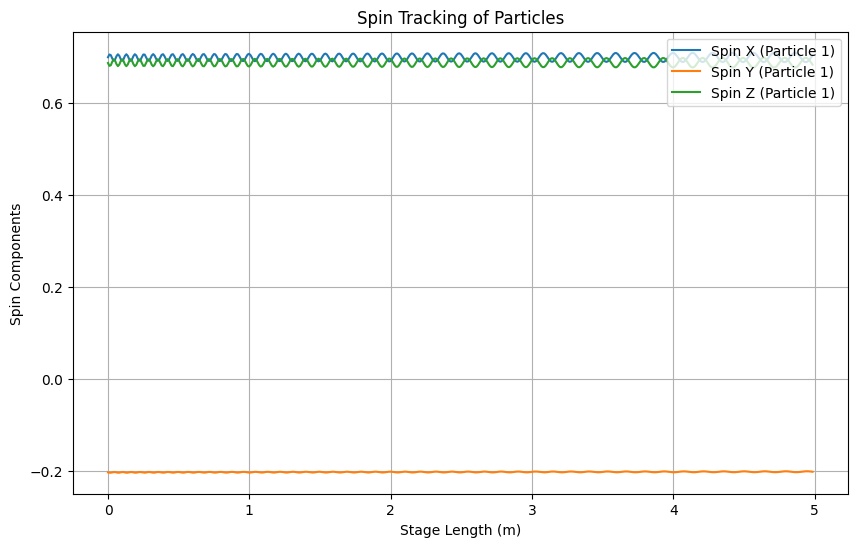

    ... #1  StageSpin #1            (s =    5.0 m) :   E =  36.9 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.1%, ε = 153.8/0.5 mm-mrad


In [72]:
linac.run('linac_spin_test', num_shots=1, overwrite=True, parallel=False)

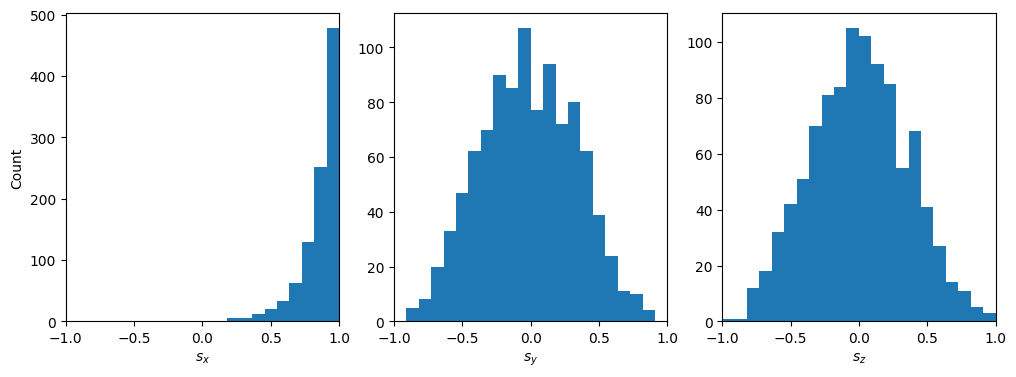

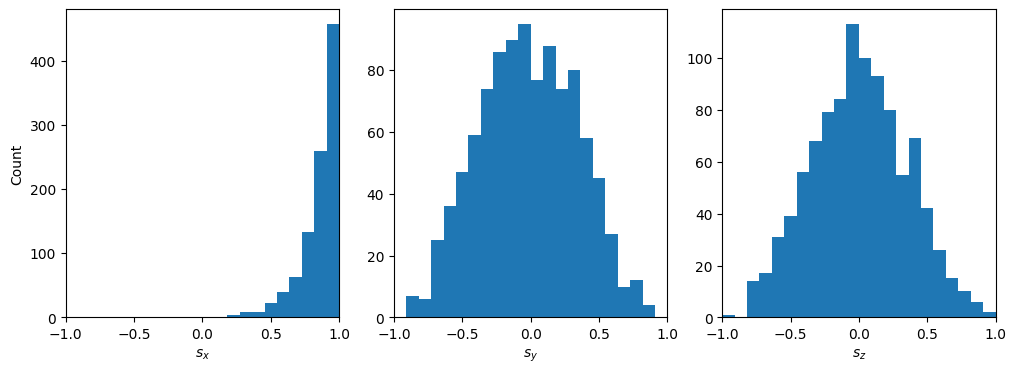

In [73]:

linac.final_beam.plot_spins()
linac.initial_beam.plot_spins()


In [ ]:
beam.plot_spins_2D()

In [ ]:
beam.save(filename='test.h5')

In [ ]:
beam2 = Beam.load(filename='test.h5')

In [ ]:
beam2.plot_spins()

In [ ]:
np.array([1, 3, 2]) 